## Analysis of local helical parameters

---

* This tutorial discuss the analyses that can be performed using the [Phython APIs](https://github.com/rjdkmr/do_x3dna/blob/master/Python_API/dnaMD.py) included in the _do\_x3dna_ package. The tutorial is prepared using [ipython notebook](http://ipython.org/notebook.html) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/helical_steps_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial
    * ``L-BPH_cdna.dat`` (``do_x3dna`` output from the trajectory, which contains the DNA bound with the protein)
    * ``L-BPH_odna.dat`` (``do_x3dna`` output from the trajectory, which only contains the free DNA)
    
    These two file **should be** present in the current/present working directory.
    
    
* The Python APIs **should be** only used when ``do_x3dna`` is executed with ``-ref`` option.


* Detailed documentation is provided [here](http://rjdkmr.github.io/do_x3dna/apidoc.html).

---

---


### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](https://github.com/rjdkmr/do_x3dna/blob/master/Python_API/dnaMD.py): Python script containing methods or functions to analyze DNA/RNA structures from the MD trajectories
    * The ``dnaMD.py`` script **should be** present in either present working directory or ``$PYTHONPATH`` environment variable.


---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dnaMD
%matplotlib inline


---

---

### Initializing DNA object and storing data to it

* [DNA object](http://rjdkmr.github.io/do_x3dna/code.html#dnaMD.DNA) is initialized by using the total number of base-pairs


* One helical-step is formed by two adjacent base-pairs. Therefore, total number of helical-steps is less than one of total number of base-pairs.


* Six helical parameters (**X-displacement**, **Y-displacement**, **helical-rise**, **Inclination**, **Tip** and **Helical-twist**) can be read and stored in DNA object from the input file using function [set_base_step_parameters(..., helical=True)](http://rjdkmr.github.io/do_x3dna/apidoc.html#dnaMD.DNA.set_base_step_parameters).

---

In [2]:
## Initialization
pdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs DNA bound with the protein
fdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs free DNA

## Loading data from input files in respective DNA object
# Number of helical steps = Number of base-pairs - one
# Number of helcial steps in a 60 base-pairs DNA = 59
# "bp=[1, 59]" will load local helical parameters of 1 to 59 base-steps
# "parameters = 'All' " will load all six parameters (X-disp, Y-disp, h-Rise, Inclination, Tip and h-Twist)
pdna.set_base_step_parameters('tutorial_data/L-BPH_cdna.dat', bp_step=[1, 59], parameters='All', step_range=True, helical=True)
fdna.set_base_step_parameters('tutorial_data/L-BPH_odna.dat', bp_step=[1, 59], parameters='All', step_range=True, helical=True)


Reading file : tutorial_data/L-BPH_cdna.dat
Reading frame 1000
Finishid reading.... Total number of frame read =  1001

Reading file : tutorial_data/L-BPH_odna.dat
Reading frame 1000
Finishid reading.... Total number of frame read =  1001


---


### Local base-step parameter of a base-pair directly from dictionary

* The ``DNA.data`` is a python dictionary which contains all the data as a Python Dictionary. For a base-step, parameter as a function of time can be directly extracted.


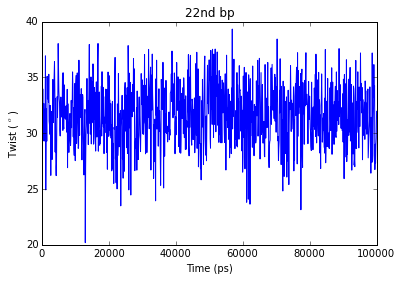

In [3]:
# Extracting "h-Twist" of 22nd bp
twist_20bp = pdna.data['bps']['22']['h-twist']

#h-Twist vs Time for 22nd bp
plt.title('22nd bp')
plt.plot(pdna.time, twist_20bp)
plt.xlabel('Time (ps)')
plt.ylabel('Twist ( $^o$)')
plt.show()

---

---

### Local helical parameters as a function of time (manually)

* A specific local helical parameters for the given base-pairs range can be extracted from the DNA obejct using function [dnaMD.DNA.get_parameters(...)](http://rjdkmr.github.io/do_x3dna/apidoc.html#dnaMD.DNA.get_parameters).


* The extracted parameters of the given helical step can be plotted as a function of time


* The extracted parameters (average) for the DNA segment can be plotted as a function of time


Following example shows **h-Twist** vs **Time** plots. These example also shows that how to extract the parameters value from the DNA object. Other properties could be extracted and plotted using similar steps.  

---

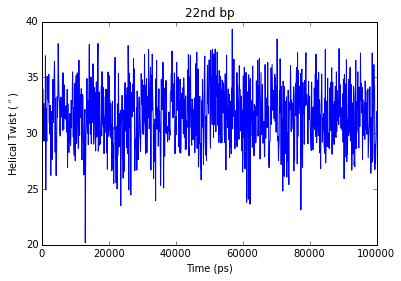

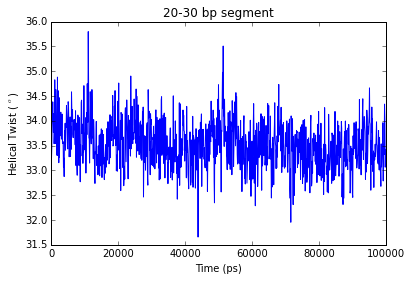

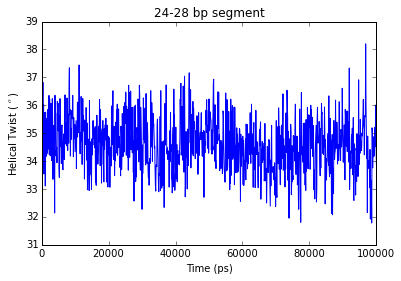

In [4]:
# Extracting "h-Twist" of 20 to 30 base-steps
twist, bp_idx = pdna.get_parameters('h-twist',[20,30], bp_range=True)

# h-Twist vs Time for 22nd base-step
plt.title('22nd bp')
plt.plot(pdna.time, twist[2])      # index is 2 for 22nd base-step: (20 + 2)
plt.xlabel('Time (ps)')
plt.ylabel('Helical Twist ( $^o$)')
plt.show()

# Average h-Twist vs Time for segment 20-30 base-step
avg_twist = np.mean(twist, axis=0)     # Calculation of mean using mean function of numpy
plt.title('20-30 bp segment')
plt.plot(pdna.time, avg_twist)
plt.xlabel('Time (ps)')
plt.ylabel('Helical Twist ( $^o$)')
plt.show()

# Average h-Twist vs Time for segment 24-28 base-step
# index of 24th base-step is 4 (20 + 4). index of 28th base-step is 8 (20 + 8)
avg_twist = np.mean(twist[4:8], axis=0)     
plt.title('24-28 bp segment')
plt.plot(pdna.time, avg_twist)
plt.xlabel('Time (ps)')
plt.ylabel('Helical Twist ( $^o$)')
plt.show()

---

---

### Local helical parameters as a function of time (using provided functions)

Above examples show the method to extract the values from the DNA object. However, [dnaMD.DNA.time_vs_parameter(...)](http://rjdkmr.github.io/do_x3dna/apidoc.html#dnaMD.DNA.time_vs_parameter) function could be use to get parameter values as a function of time for the given base-pairs/step or segment

---

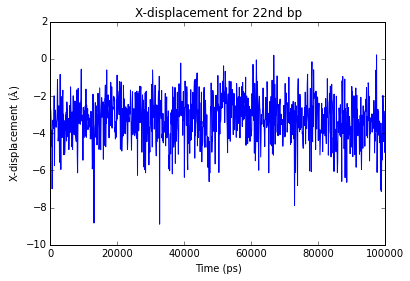

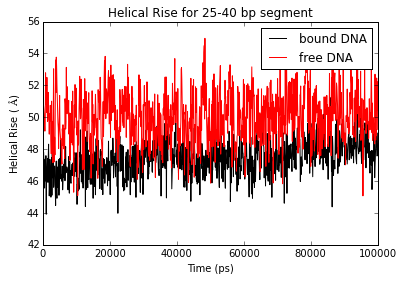

In [5]:
# X-disp vs Time for 22nd bp
plt.title('X-displacement for 22nd bp')
time, value = pdna.time_vs_parameter('x-disp', [22])
plt.plot(time, value)
plt.xlabel('Time (ps)')
plt.ylabel('X-displacement ($\AA$)')
plt.show()

# Helical Rise vs Time for 25-40 bp segment
plt.title('Helical Rise for 25-40 bp segment')
# Bound DNA
# Helical Rise is the length of helix formed between two base-pairs, so for a given segment it is sum over the base-steps
time, value = pdna.time_vs_parameter('h-rise', [25, 40], merge=True, merge_method='sum')
plt.plot(time, value, label='bound DNA', c='k')     # balck color => bound DNA
# Free DNA
time, value = fdna.time_vs_parameter('h-rise', [25, 40], merge=True, merge_method='sum')
plt.plot(time, value, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Time (ps)')
plt.ylabel('Helical Rise ( $\AA$)')
plt.legend()
plt.show()

---

---

### Distribution of local helical parameters during MD simulations

* As shown in above plot of Time vs Helical Rise, comparison between bound and free DNA is very difficult. Therefore, to compare the parameters of either different DNAs or same DNAs in different environment or different segment of same DNAs, the distribution of parameters over the MD trajectory are sometime useful.


* The distribution could be calculated using the function [dnaMD.DNA.parameter_distribution(...)](http://rjdkmr.github.io/do_x3dna/apidoc.html#dnaMD.DNA.parameter_distribution) as shown in the following examples.


* The normalized distribution is calculated using [numpy.histogram(...)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html).

---

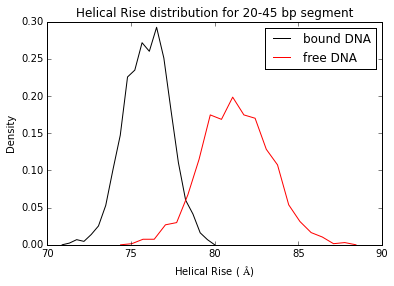

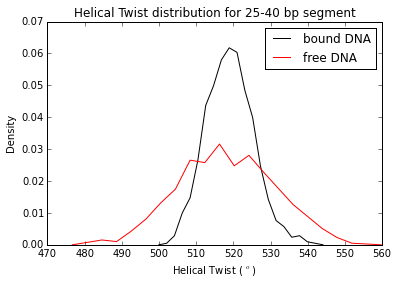

In [6]:
#### Helical Rise distribution for 20-45 bp segment
plt.title('Helical Rise distribution for 20-45 bp segment')

### Bound DNA ###

## calculation of parameter distribution for the segment
values, density = pdna.parameter_distribution('h-rise', [20, 45], bins=20, merge=True, merge_method='sum')

## plot distribution
plt.plot(values, density, label='bound DNA', c='k')     # balck color => bound DNA

### Free DNA ###

## calculation of parameter distribution for the segment
values, density = fdna.parameter_distribution('h-rise', [20, 45], bins=20, merge=True, merge_method='sum')

## plot distribution
plt.plot(values, density, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Helical Rise ( $\AA$)')
plt.ylabel('Density')
plt.legend()
plt.show()


#### Helical Twist distribution for 25-40 bp segment
plt.title('Helical Twist distribution for 25-40 bp segment')

### Bound DNA ###

## calculation of parameter distribution for the segment
# Helical Twist is a measure of twisting in the helix formed between two base-pairs, so for helical twist of a given segment 
# is considered here as sum over the base-steps
values, density = pdna.parameter_distribution('h-twist', [25, 40], bins=20, merge=True, merge_method='sum')

## plot distribution
plt.plot(values, density, label='bound DNA', c='k')     # balck color => bound DNA

### Free DNA ###

## calculation of parameter distribution for the segment
values, density = fdna.parameter_distribution('h-twist', [25, 40], bins=20, merge=True, merge_method='sum')

## plot distribution
plt.plot(values, density, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Helical Twist ( $^o$)')
plt.ylabel('Density')
plt.legend()
plt.show()

---

---

### Local helical parameters as a function of base-steps

* What is the average values of a given parameter for either each helical step or a DNA segment?


* To address this question, average values of a given parameter with its error could be calculated for either each base-step or a DNA segment using a function [dnaMD.DNA.get_mean_error(...)](http://rjdkmr.github.io/do_x3dna/apidoc.html#dnaMD.DNA.get_parameters).


* This average values could be also use to compare two DNA.


* Standard error could be calculated using block averaging method as derived in this [publication](http://scitation.aip.org/content/aip/journal/jcp/116/1/10.1063/1.1421362). To use this method, [g_analyze](http://manual.gromacs.org/programs/gmx-analyze.html) of GROMACS package should be present in ``$PATH`` environment variable.

---


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


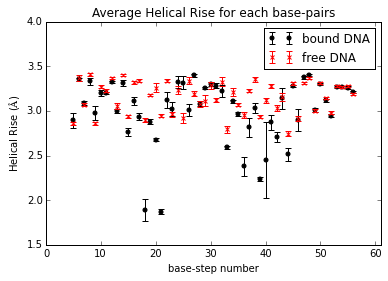

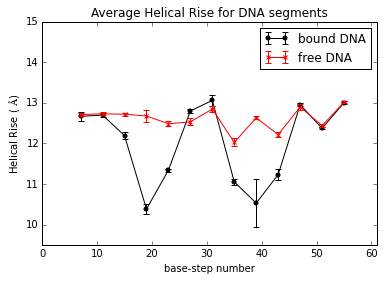

In [7]:
######## Average Helical Rise as a function of base-steps ########

plt.title('Average Helical Rise for each base-pairs')

### Calculating Average Helical Rise values for 5 to 56 base-steps DNA bound with protein
bp, rise, error = pdna.get_mean_error([5, 56], 'h-rise', err_type='block', bp_range=True)

# plot these values
plt.errorbar(bp, rise, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4, label='bound DNA' )

### Calculating Average Helical Rise values for 5 to 56 base-steps DNA
bp, rise, error = fdna.get_mean_error([5, 56], 'h-rise', err_type='block', bp_range=True)

# plot these values
plt.errorbar(bp, rise, yerr=error, ecolor='r', elinewidth=1, color='r', lw=0, marker='x', mfc='r', mew=1, ms=4, label='free DNA' )

plt.ylabel('Helical Rise ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.ylim(1.5, 4.0)
plt.legend()
plt.show()

######## Average Helical Rise as a function of DNA segments ########

plt.title('Average Helical Rise for DNA segments')

### Calculating Average Helical Rise for 5 to 56 base-steps DNA bound with protein
### DNA segments are assumed to made up of 4 base-steps (merge_bp=4)
bp, rise, error = pdna.get_mean_error([5,56], 'h-rise', err_type='block', bp_range=True, merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(bp, rise,yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4, label='bound DNA' )

### Calculating Average Helical Rise values for 5 to 56 base-steps DNA
### DNA segments are assumed to made up of 5 base-steps (merge_bp=4)
bp, rise, error = fdna.get_mean_error([5,56], 'h-rise', err_type='block', bp_range=True, merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(bp, rise, yerr=error, ecolor='r', elinewidth=1, color='r', lw=1, marker='x', mfc='r', mew=1, ms=4, label='free DNA' )

plt.ylabel('Helical Rise ( $\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.ylim(9.5, 15.0)
plt.legend()
plt.show()

----

----

### Deviation in parameters of bound DNA with respect to free DNA

As discussed in the above section, average parameters with standard error can be calculated for both bound and free DNA. Additionally, deviation in bound DNA with respect to the free DNA could be calculated using function [dnaMD.dev_bps_vs_parameter(...)](http://rjdkmr.github.io/do_x3dna/apidoc.html#dnaMD.dev_bps_vs_parameter) as shown in the following example.

---

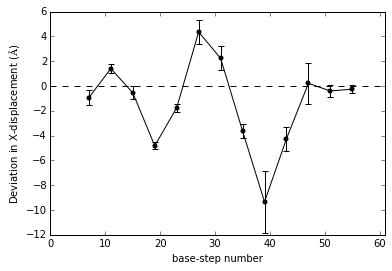

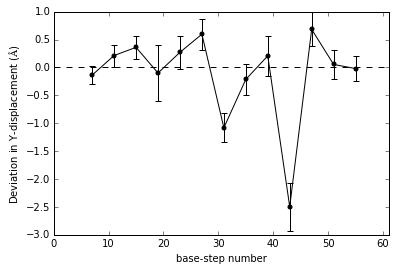

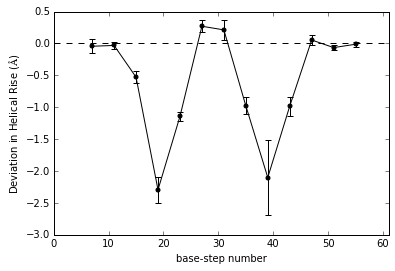

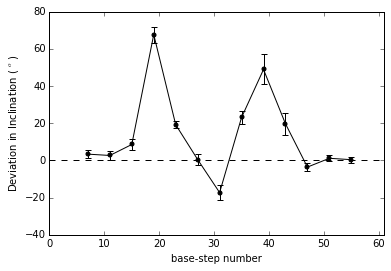

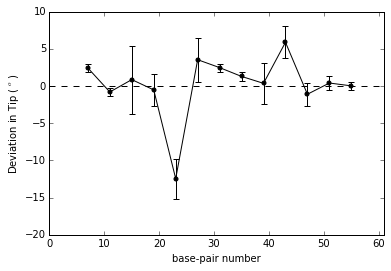

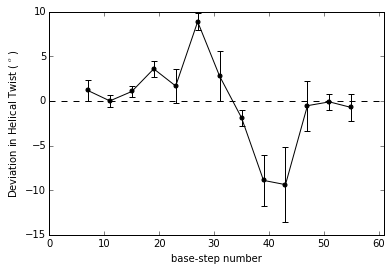

In [8]:
#### Deviation in X-disp, Y-disp, h-Rise, Inclination, Tip and h-Twist
#### Deviation = Bound DNA(parameter) - Free DNA(parameter) 

### Deviation in X-displacement
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 
                                                                'x-disp', err_type='block', bp_range=True, 
                                                                merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in X-displacement ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()

### Deviation in Y-displacement
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 
                                                              'y-disp', err_type='block', bp_range=True, 
                                                              merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Y-displacement ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()

### Deviation in Helical Rise
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 
                                                              'h-rise', err_type='block', bp_range=True, 
                                                              merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Helical Rise ($\AA$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()

### Deviation in Inclination
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 
                                                              'inclination', err_type='block', bp_range=True, 
                                                              merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Inclination ( $^o$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()

### Deviation in Tip
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 
                                                              'tip', err_type='block', bp_range=True, 
                                                              merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Tip ( $^o$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.show()

### Deviation in Helical Twist
fdna_bp, pdna_bp, deviation, error = dnaMD.dev_bps_vs_parameter(pdna, [5,56], fdna, [5,56], 
                                                              'h-twist', err_type='block', bp_range=True, 
                                                              merge_bp=4, merge_method='sum')

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=1, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Helical Twist ( $^o$)')
plt.xlabel('base-step number')
plt.xlim(0,61)
plt.show()